In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
import numpy as np
from qiskit.circuit.library.standard_gates import RYGate
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate

In [4]:
sh1 = MCXGate(1)
sh2 = MCXGate(2)
sh3 = MCXGate(3)
sh4 = MCXGate(4)

In [5]:
def shift_qc(circ):     #take step
    circ.h(0)
    circ.x(0)
    circ.cx(0,5)
    circ.x(5)
    circ.append(sh2, [0,5,6])
    circ.x(6)
    circ.append(sh3, [0,5,6,7])
    circ.x(7)
    circ.append(sh4, [0,5,6,7,8])
    circ.x(5)
    circ.x(6)
    circ.x(7)
    circ.x(0)
    circ.cx(0,1)
    circ.x(1)
    circ.append(sh2, [0,1,2])
    circ.x(2)
    circ.append(sh3, [0,1,2,3])
    circ.x(3)
    circ.append(sh4, [0,1,2,3,4])
    circ.x(0)
    circ.x(1)
    circ.x(2)
    circ.x(3)
    return 0

def make_qcs(steps):     #circuit generating function
    circ = QuantumCircuit(9,8)

    circ.x(0)
    circ.h(0)
    circ.p(np.pi/2, 0)
    
    for i in range(steps):
        shift_qc(circ)
    circ.barrier()
    circ.measure(1,0)
    circ.measure(2,1)
    circ.measure(3,2)
    circ.measure(4,3)
    circ.measure(5,4)
    circ.measure(6,5)
    circ.measure(7,6)
    circ.measure(8,7)
    return circ



In [6]:
check = make_qcs(4)  ## make quantuam work circuit 4step

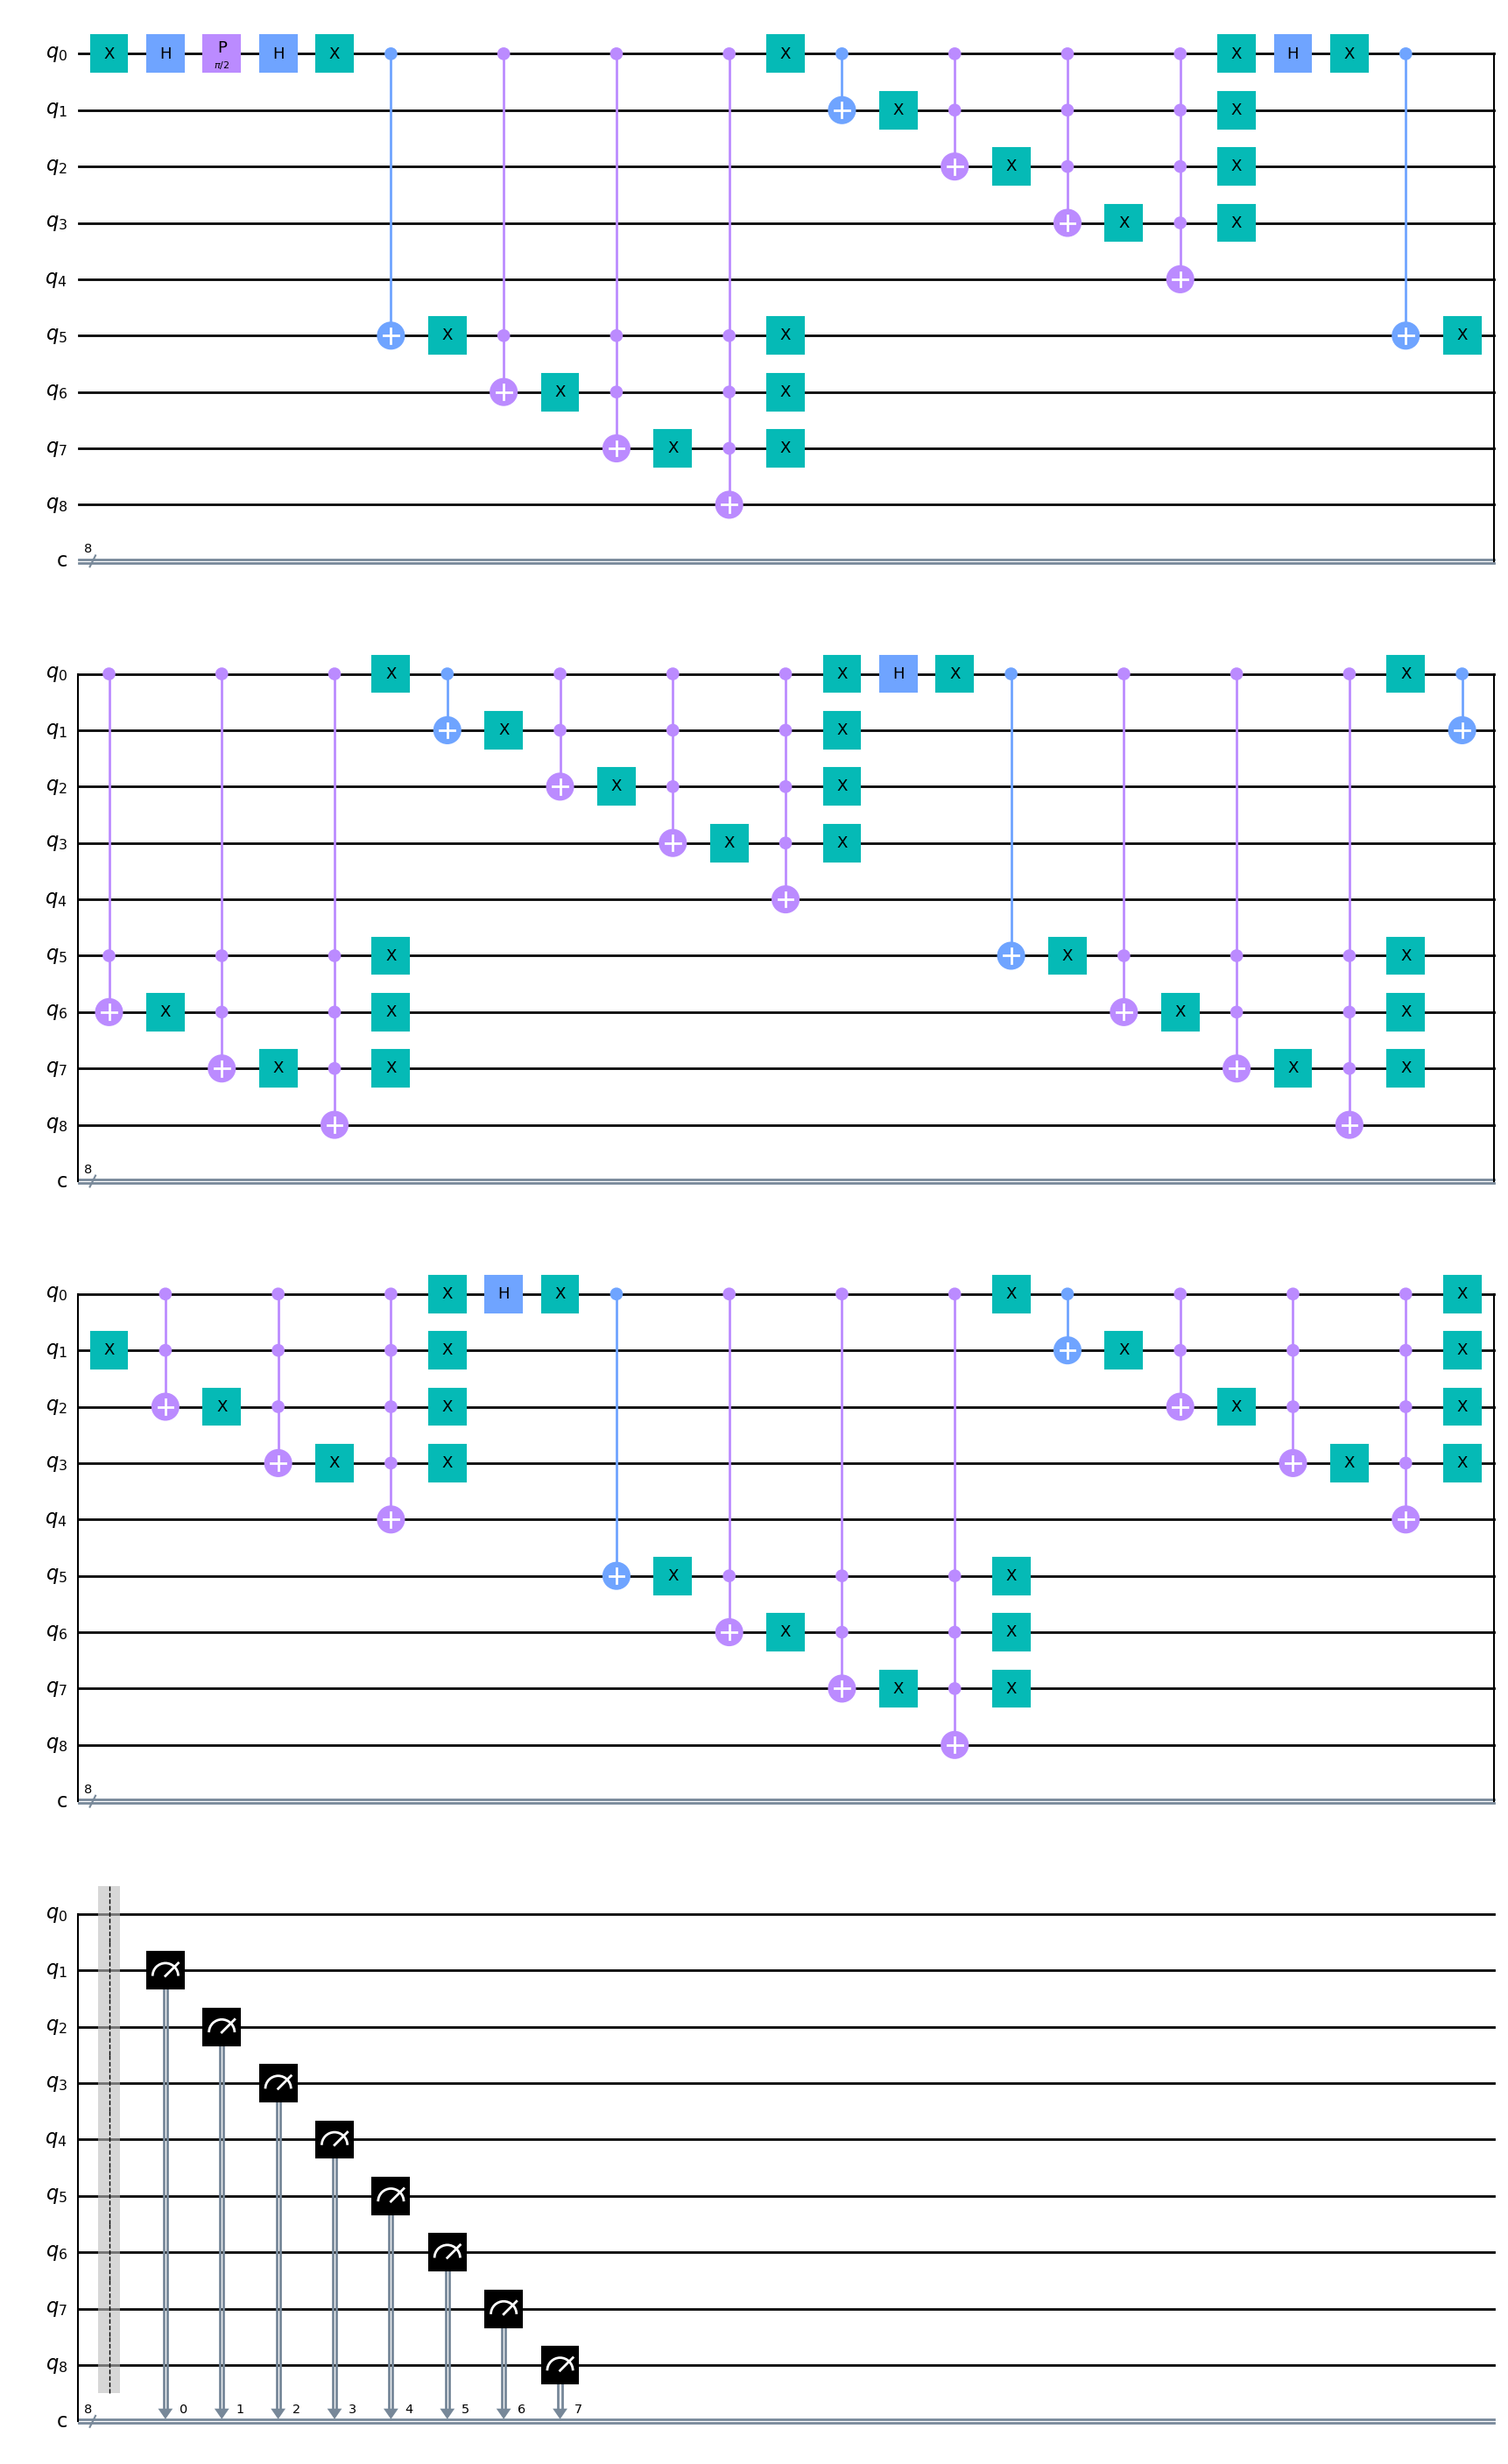

In [7]:
check.draw('mpl')

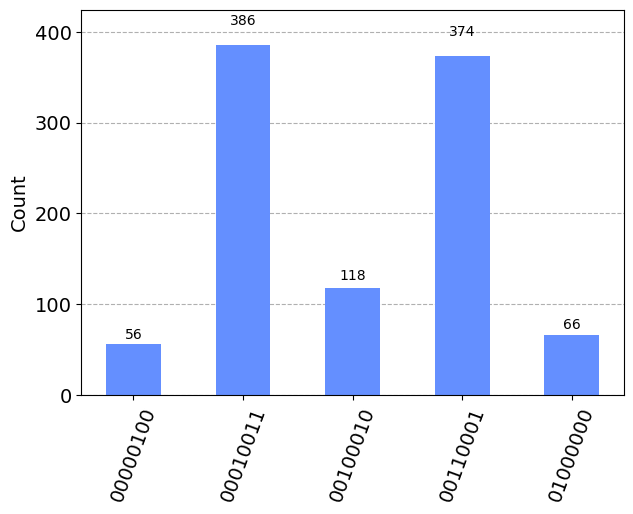

In [9]:
simulator = Aer.get_backend('aer_simulator_statevector')
job = execute(check, simulator, shots=1000)
result = job.result()


counts  = result.get_counts()
plot_histogram(counts)
## result |0000 0000> it means, first 4 qubits mean that how many times go left, and last 4 qubits mean that how many times gp rogjt
## we can determine postion by these two result